### Análisis de imagen 4
#### Elaborado por Angela Cristina Villate
#### Diciembre del 2023

In [22]:
#se importan las librerías
import cv2
from matplotlib import pyplot as plt
from pylab import *

In [21]:
# Cargar la imagen
imagen = cv2.imread('image4.tif')

# Verificar si la carga de la imagen fue exitosa
if imagen is None:
    print("Error al cargar la imagen.")
else:
    print("Imagen cargada correctamente.")

# Mostrar la imagen
cv2.imshow('Imagen', imagen)
cv2.waitKey(0)
cv2.destroyAllWindows()

Imagen cargada correctamente.


In [3]:
# Convertir la imagen a formato RGB
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

# Mostrar la imagen RGB
cv2.imshow('Imagen RGB', imagen_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()
# Guardar la imagen RGB en un archivo PNG
cv2.imwrite('imagen_rgb.png', cv2.cvtColor(imagen_rgb, cv2.COLOR_RGB2BGR))

True

Imagen cargada correctamente.


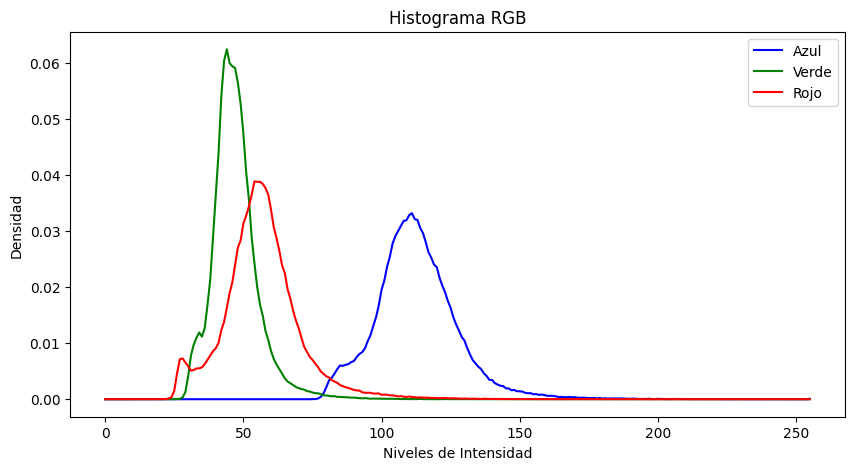

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Cargar la imagen
imagen = cv2.imread('image4.tif')

# Verificar si la carga de la imagen fue exitosa
if imagen is None:
    print("Error al cargar la imagen.")
else:
    print("Imagen cargada correctamente.")

    # Dividir la imagen en canales RGB
    blue_channel, green_channel, red_channel = cv2.split(imagen)

    # Calcular los histogramas para cada canal
    hist_blue, bins_blue = np.histogram(blue_channel.flatten(), bins=256, range=[0, 256], density=True)
    hist_green, bins_green = np.histogram(green_channel.flatten(), bins=256, range=[0, 256], density=True)
    hist_red, bins_red = np.histogram(red_channel.flatten(), bins=256, range=[0, 256], density=True)

    # Mostrar los histogramas de los tres canales juntos
    plt.figure(figsize=(10, 5))
    plt.plot(hist_blue, color='blue', label='Azul')
    plt.plot(hist_green, color='green', label='Verde')
    plt.plot(hist_red, color='red', label='Rojo')

    plt.title('Histograma RGB')
    plt.xlabel('Niveles de Intensidad')
    plt.ylabel('Densidad')
    plt.legend()
    plt.show()
    plt.show()

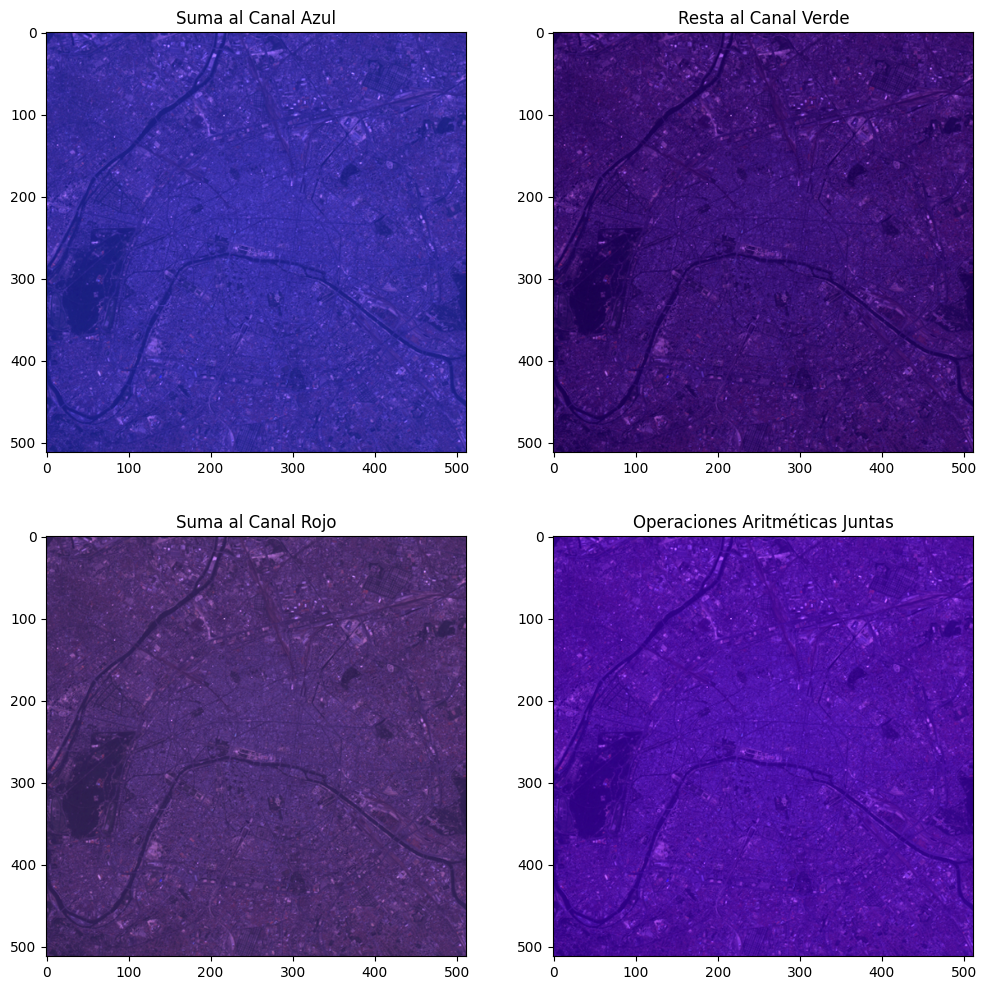

In [6]:
 # Mostrar cada operación aritmética por separado
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Suma al canal azul
blue_channel_suma = cv2.add(blue_channel, 50)
axs[0, 0].imshow(cv2.cvtColor(cv2.merge([blue_channel_suma, green_channel, red_channel]), cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Suma al Canal Azul')

# Resta al canal verde
green_channel_resta = cv2.subtract(green_channel, 30)
axs[0, 1].imshow(cv2.cvtColor(cv2.merge([blue_channel, green_channel_resta, red_channel]), cv2.COLOR_BGR2RGB))
axs[0, 1].set_title('Resta al Canal Verde')

# Suma al canal rojo
red_channel_suma = cv2.add(red_channel, 20)
axs[1, 0].imshow(cv2.cvtColor(cv2.merge([blue_channel, green_channel, red_channel_suma]), cv2.COLOR_BGR2RGB))
axs[1, 0].set_title('Suma al Canal Rojo')

# Todas las operaciones juntas
imagen_modificada = cv2.merge([blue_channel_suma, green_channel_resta, red_channel_suma])
axs[1, 1].imshow(cv2.cvtColor(imagen_modificada, cv2.COLOR_BGR2RGB))
axs[1, 1].set_title('Operaciones Aritméticas Juntas')

plt.show()

### brillo y  contraste

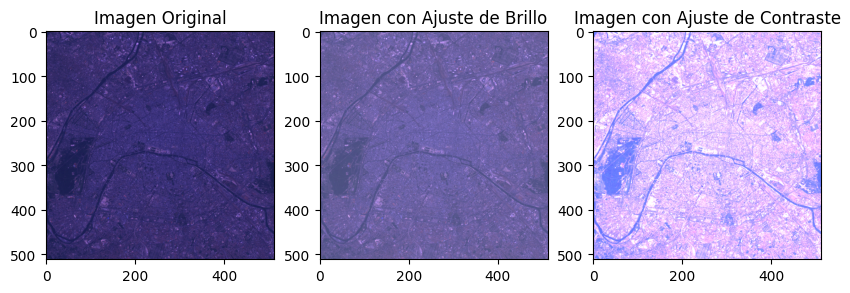

In [9]:
# Ajustar el brillo (ejemplo: aumentar el brillo en 50)
brillo = 50
imagen_brillo = cv2.addWeighted(imagen, 1, np.zeros(imagen.shape, imagen.dtype), 0, brillo)

# Ajustar el contraste (ejemplo: aumentar el contraste en 1.5 veces) contraste = 1.5
contraste = 4
imagen_contraste = cv2.convertScaleAbs(imagen, alpha=contraste, beta=0)

# Mostrar la imagen original y las imágenes con ajuste de brillo y contraste
plt.figure(figsize=(10, 5))

plt.subplot(131)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')

plt.subplot(132)
plt.imshow(cv2.cvtColor(imagen_brillo, cv2.COLOR_BGR2RGB))
plt.title('Imagen con Ajuste de Brillo')

plt.subplot(133)
plt.imshow(cv2.cvtColor(imagen_contraste, cv2.COLOR_BGR2RGB))
plt.title('Imagen con Ajuste de Contraste')

plt.show()

### el contraste da más información

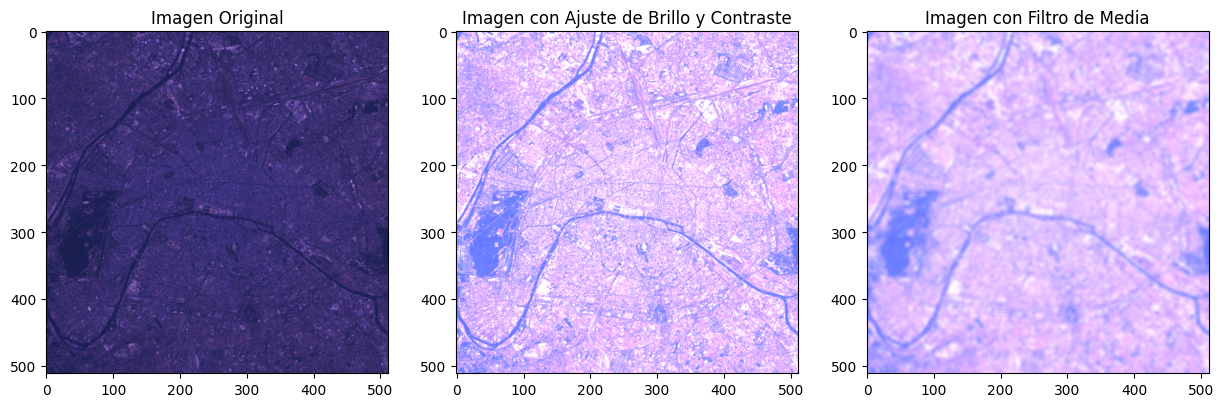

In [11]:
tamano_kernel = (7, 7)  # Puedes ajustar el tamaño del kernel según tus necesidades
imagen_filtrada = cv2.blur(imagen_contraste, tamano_kernel)

# Mostrar la imagen original y la imagen con ajuste de brillo, contraste y filtro de media
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')

plt.subplot(132)
plt.imshow(cv2.cvtColor(imagen_contraste, cv2.COLOR_BGR2RGB))
plt.title('Imagen con Ajuste de Brillo y Contraste')

plt.subplot(133)
plt.imshow(cv2.cvtColor(imagen_filtrada, cv2.COLOR_BGR2RGB))
plt.title('Imagen con Filtro de Media')

plt.show()

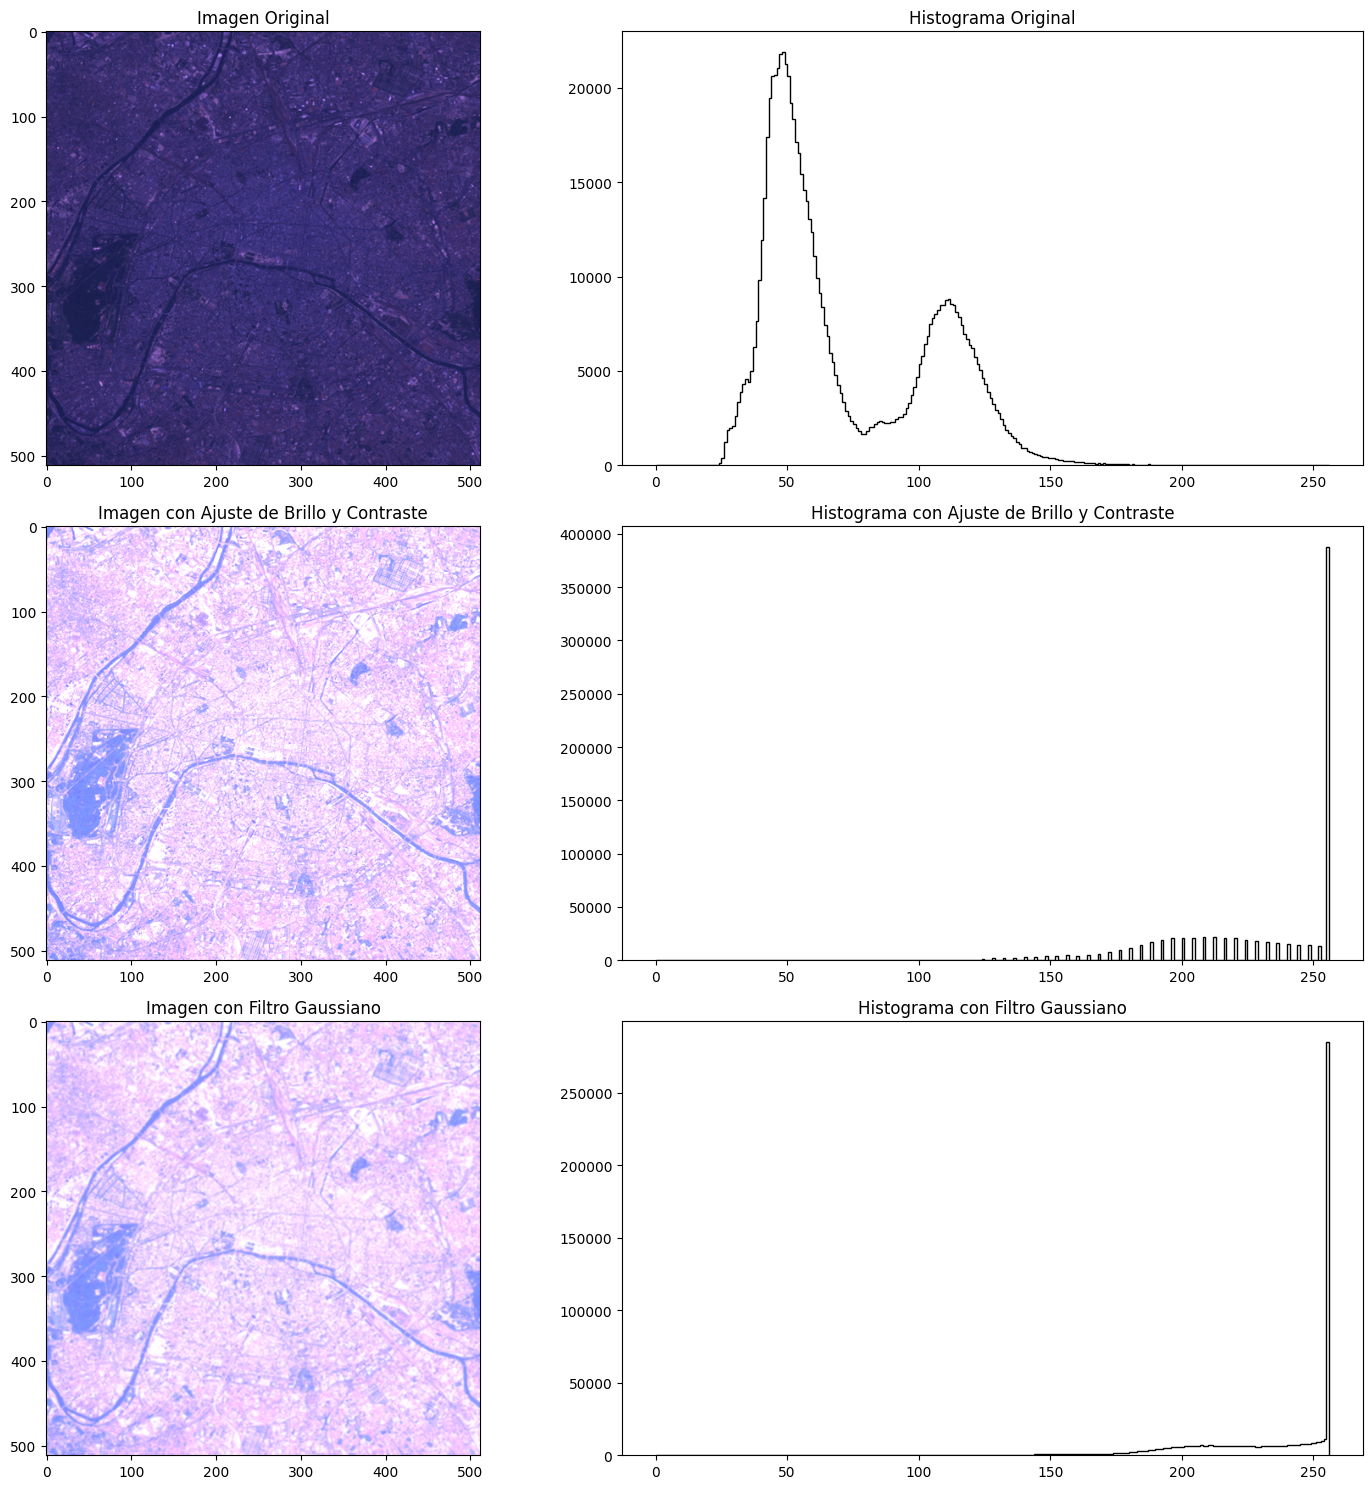

In [14]:
# Ajustar el brillo (ejemplo: aumentar el brillo en 100)
brillo = 5
imagen_brillo = cv2.addWeighted(imagen, 1, np.zeros(imagen.shape, imagen.dtype), 0, brillo)

# Ajustar el contraste (ejemplo: aumentar el contraste en 1.5 veces)
contraste = 4
imagen_contraste = cv2.convertScaleAbs(imagen_brillo, alpha=contraste, beta=0)

# Aplicar el filtro gaussiano
tamano_kernel = (3, 3)
imagen_filtrada = cv2.GaussianBlur(imagen_contraste, tamano_kernel, 0)

# Mostrar las imágenes y sus histogramas
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Mostrar la imagen original y su histograma
axs[0, 0].imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Imagen Original')
axs[0, 1].hist(imagen.ravel(), bins=256, range=[0, 256], color='black', histtype='step')
axs[0, 1].set_title('Histograma Original')

# Mostrar la imagen con ajuste de brillo y contraste y su histograma
axs[1, 0].imshow(cv2.cvtColor(imagen_contraste, cv2.COLOR_BGR2RGB))
axs[1, 0].set_title('Imagen con Ajuste de Brillo y Contraste')
axs[1, 1].hist(imagen_contraste.ravel(), bins=256, range=[0, 256], color='black', histtype='step')
axs[1, 1].set_title('Histograma con Ajuste de Brillo y Contraste')

# Mostrar la imagen con filtro gaussiano y su histograma
axs[2, 0].imshow(cv2.cvtColor(imagen_filtrada, cv2.COLOR_BGR2RGB))
axs[2, 0].set_title('Imagen con Filtro Gaussiano')
axs[2, 1].hist(imagen_filtrada.ravel(), bins=256, range=[0, 256], color='black', histtype='step')
axs[2, 1].set_title('Histograma con Filtro Gaussiano')

plt.tight_layout()
plt.show()

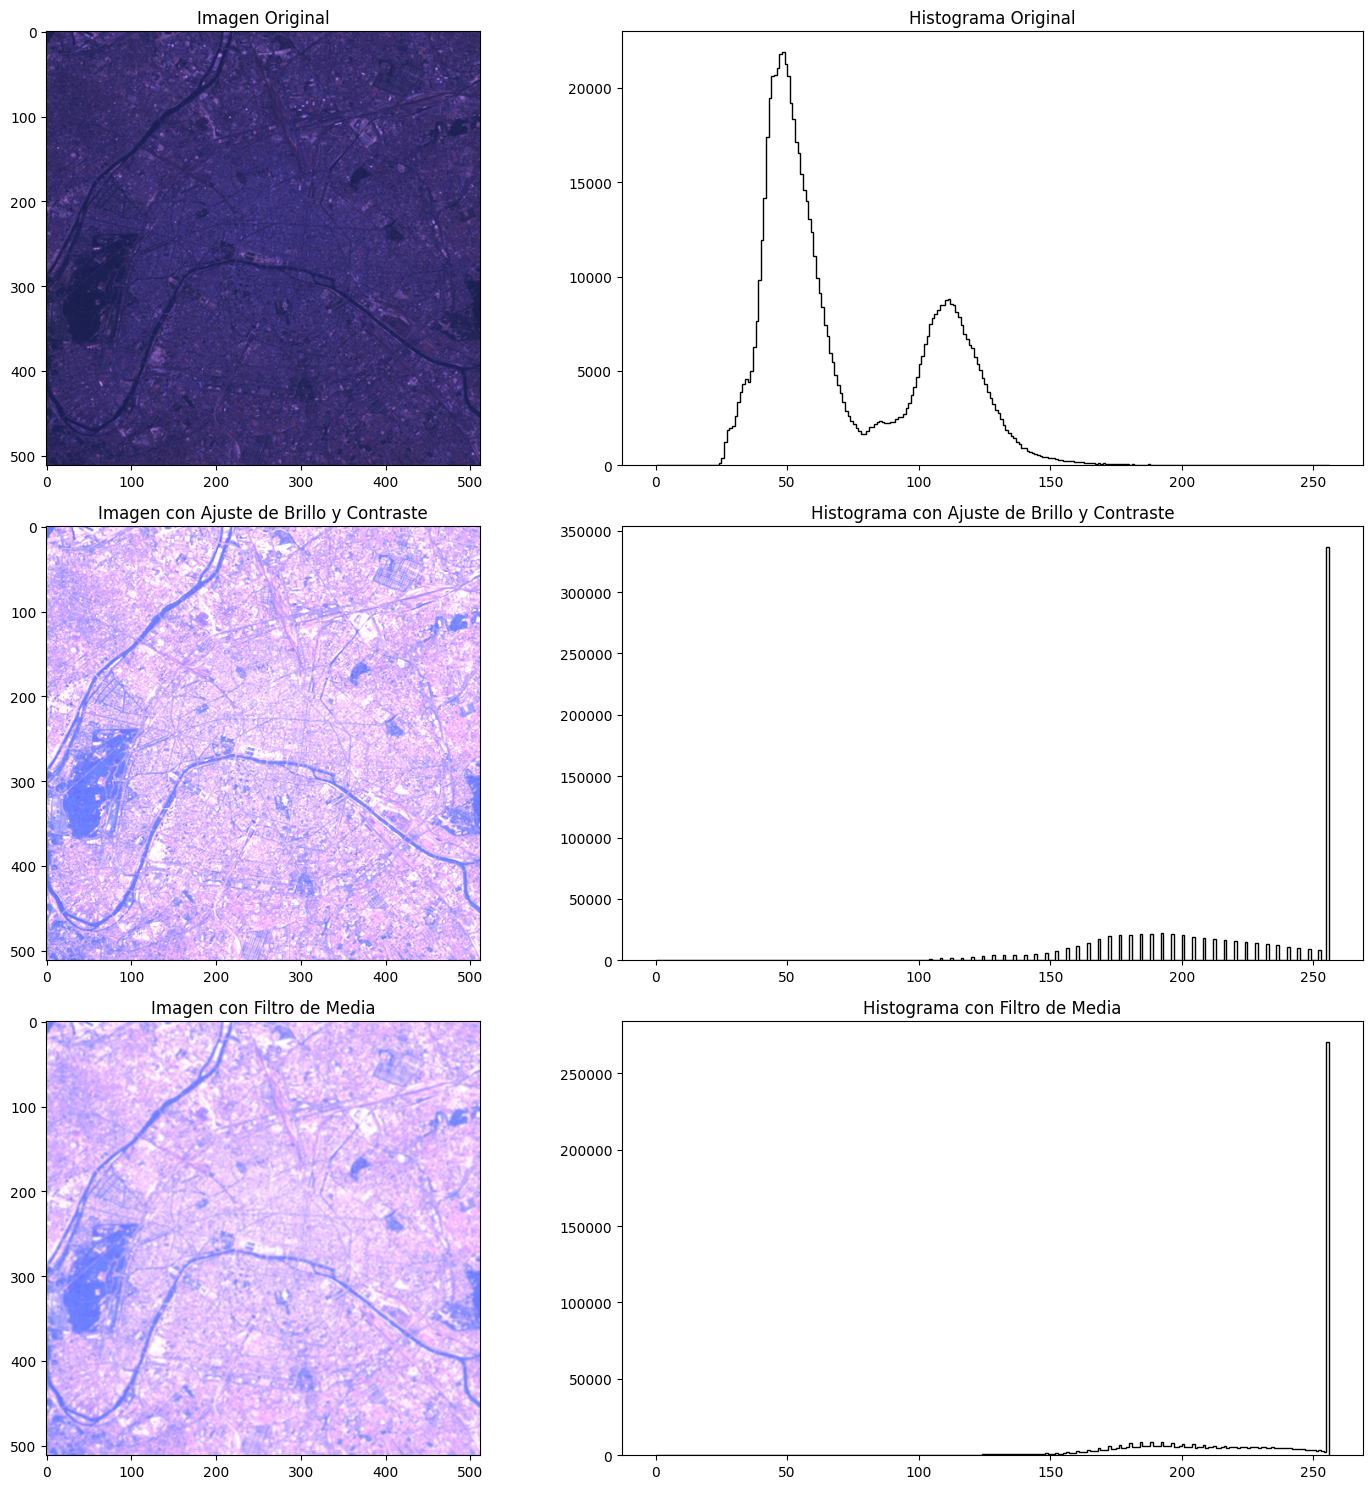

In [15]:
    # Ajustar el brillo (ejemplo: aumentar el brillo en 50)
brillo = 50
imagen_brillo = cv2.addWeighted(imagen, 1, np.zeros(imagen.shape, imagen.dtype), 0, brillo)

# Ajustar el contraste (ejemplo: aumentar el contraste en 1.5 veces)
contraste = 4
imagen_contraste = cv2.convertScaleAbs(imagen, alpha=contraste, beta=0)

# Aplicar el filtro de media
tamano_kernel = (3, 3)
imagen_filtrada = cv2.blur(imagen_contraste, tamano_kernel)

# Mostrar las imágenes y sus histogramas
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Mostrar la imagen original y su histograma
axs[0, 0].imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Imagen Original')
axs[0, 1].hist(imagen.ravel(), bins=256, range=[0, 256], color='black', histtype='step')
axs[0, 1].set_title('Histograma Original')

# Mostrar la imagen con ajuste de brillo y contraste y su histograma
axs[1, 0].imshow(cv2.cvtColor(imagen_contraste, cv2.COLOR_BGR2RGB))
axs[1, 0].set_title('Imagen con Ajuste de Brillo y Contraste')
axs[1, 1].hist(imagen_contraste.ravel(), bins=256, range=[0, 256], color='black', histtype='step')
axs[1, 1].set_title('Histograma con Ajuste de Brillo y Contraste')

# Mostrar la imagen con filtro de media y su histograma
axs[2, 0].imshow(cv2.cvtColor(imagen_filtrada, cv2.COLOR_BGR2RGB))
axs[2, 0].set_title('Imagen con Filtro de Media')
axs[2, 1].hist(imagen_filtrada.ravel(), bins=256, range=[0, 256], color='black', histtype='step')
axs[2, 1].set_title('Histograma con Filtro de Media')

plt.tight_layout()
plt.show()

### umbralización logarítmica 

Imagen cargada correctamente.


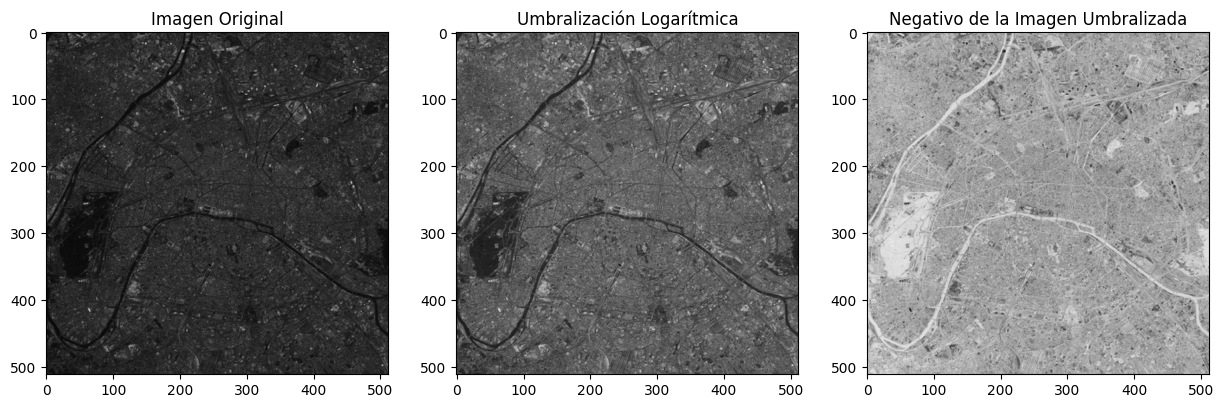

In [16]:
# Cargar la imagen
imagen = cv2.imread('image4.tif', cv2.IMREAD_GRAYSCALE)

# Verificar si la carga de la imagen fue exitosa
if imagen is None:
    print("Error al cargar la imagen.")
else:
    print("Imagen cargada correctamente.")

    # Aplicar la umbralización logarítmica
    c = 255 / np.log(1 + np.max(imagen))
    imagen_umbralizada = c * (np.log(imagen + 1))

    # Convertir la imagen resultante a tipo de dato entero de 8 bits
    imagen_umbralizada = np.uint8(imagen_umbralizada)

    # Aplicar la función de negativo
    imagen_negativo = 255 - imagen_umbralizada

    # Mostrar la imagen original, la imagen umbralizada logarítmicamente y el negativo
    plt.figure(figsize=(15, 5))

    plt.subplot(131)
    plt.imshow(imagen, cmap='gray')
    plt.title('Imagen Original')

    plt.subplot(132)
    plt.imshow(imagen_umbralizada, cmap='gray')
    plt.title('Umbralización Logarítmica')

    plt.subplot(133)
    plt.imshow(imagen_negativo, cmap='gray')
    plt.title('Negativo de la Imagen Umbralizada')

    plt.show()

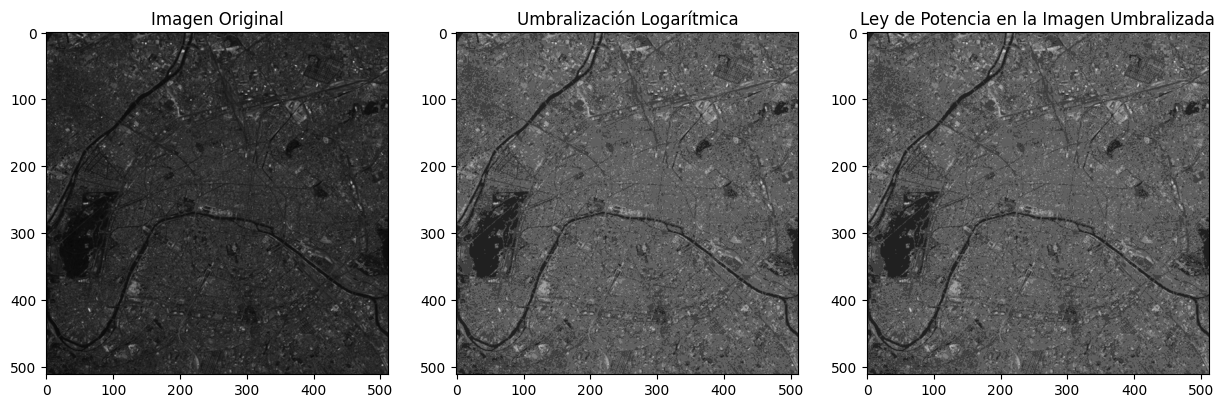

In [18]:
# Aplicar la umbralización logarítmica
c = 20 / np.log(1 + np.max(imagen))
imagen_umbralizada = c * (np.log(imagen + 1))

# Convertir la imagen resultante a tipo de dato entero de 8 bits
imagen_umbralizada = np.uint8(imagen_umbralizada)

# Aplicar la ley de potencia
gamma = 0.5  # Puedes ajustar el valor de gamma según tus necesidades
imagen_potencia = np.power(imagen_umbralizada / 255.0, gamma) * 255
imagen_potencia = np.uint8(imagen_potencia)

# Mostrar la imagen original, la imagen umbralizada logarítmicamente y la imagen con ley de potencia
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')

plt.subplot(132)
plt.imshow(imagen_umbralizada, cmap='gray')
plt.title('Umbralización Logarítmica')

plt.subplot(133)
plt.imshow(imagen_potencia, cmap='gray')
plt.title('Ley de Potencia en la Imagen Umbralizada')

plt.show()

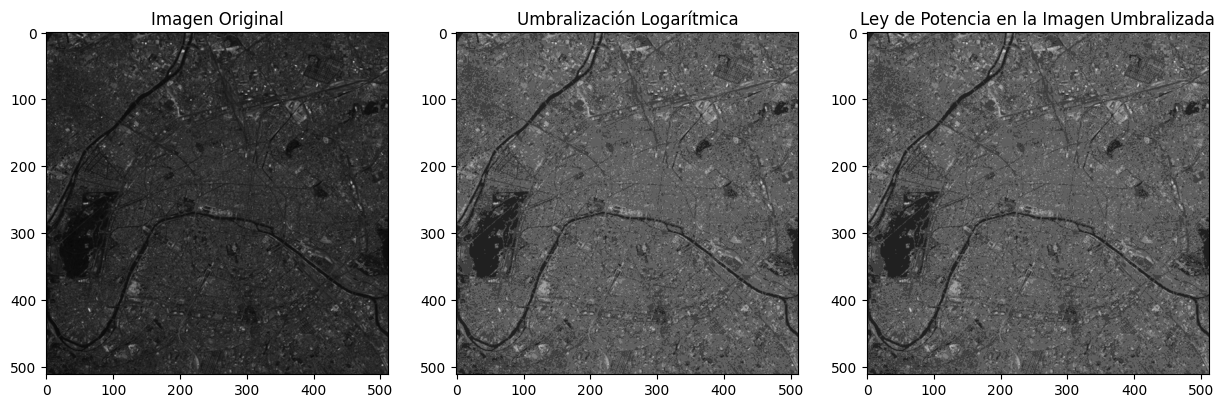

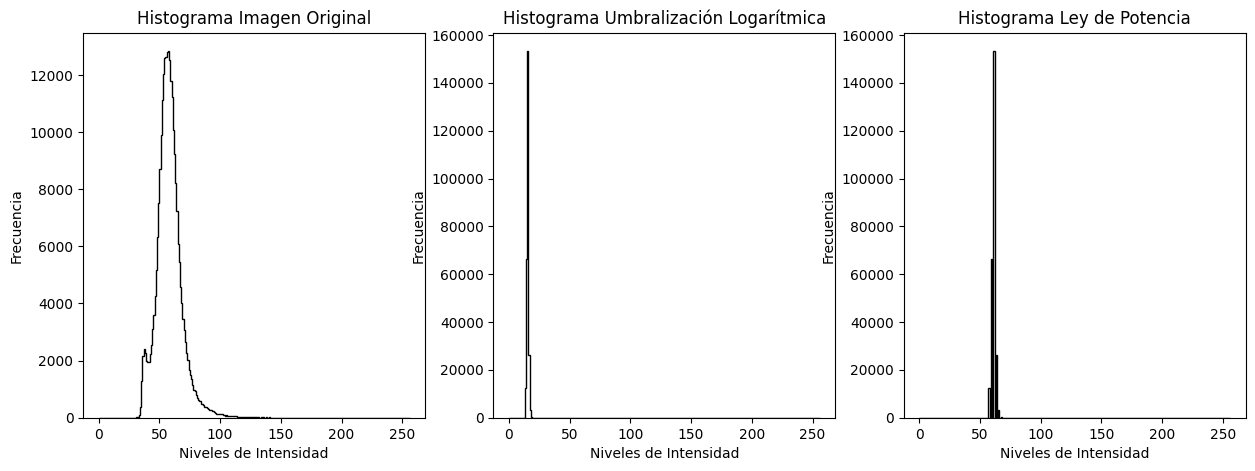

In [19]:
 # Aplicar la umbralización logarítmica
c = 20 / np.log(1 + np.max(imagen))
imagen_umbralizada = c * (np.log(imagen + 1))

# Convertir la imagen resultante a tipo de dato entero de 8 bits
imagen_umbralizada = np.uint8(imagen_umbralizada)

# Aplicar la ley de potencia
gamma = 0.5  # Puedes ajustar el valor de gamma según tus necesidades
imagen_potencia = np.power(imagen_umbralizada / 255.0, gamma) * 255
imagen_potencia = np.uint8(imagen_potencia)

# Mostrar la imagen original, la imagen umbralizada logarítmicamente y la imagen con ley de potencia
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(imagen, cmap='gray')
axs[0].set_title('Imagen Original')

axs[1].imshow(imagen_umbralizada, cmap='gray')
axs[1].set_title('Umbralización Logarítmica')

axs[2].imshow(imagen_potencia, cmap='gray')
axs[2].set_title('Ley de Potencia en la Imagen Umbralizada')

# Mostrar los histogramas de las imágenes
fig_hist, axs_hist = plt.subplots(1, 3, figsize=(15, 5))

axs_hist[0].hist(imagen.flatten(), bins=256, range=[0, 256], color='black', histtype='step')
axs_hist[0].set_title('Histograma Imagen Original')
axs_hist[0].set_xlabel('Niveles de Intensidad')
axs_hist[0].set_ylabel('Frecuencia')

axs_hist[1].hist(imagen_umbralizada.flatten(), bins=256, range=[0, 256], color='black', histtype='step')
axs_hist[1].set_title('Histograma Umbralización Logarítmica')
axs_hist[1].set_xlabel('Niveles de Intensidad')
axs_hist[1].set_ylabel('Frecuencia')

axs_hist[2].hist(imagen_potencia.flatten(), bins=256, range=[0, 256], color='black', histtype='step')
axs_hist[2].set_title('Histograma Ley de Potencia')
axs_hist[2].set_xlabel('Niveles de Intensidad')
axs_hist[2].set_ylabel('Frecuencia')

plt.show()

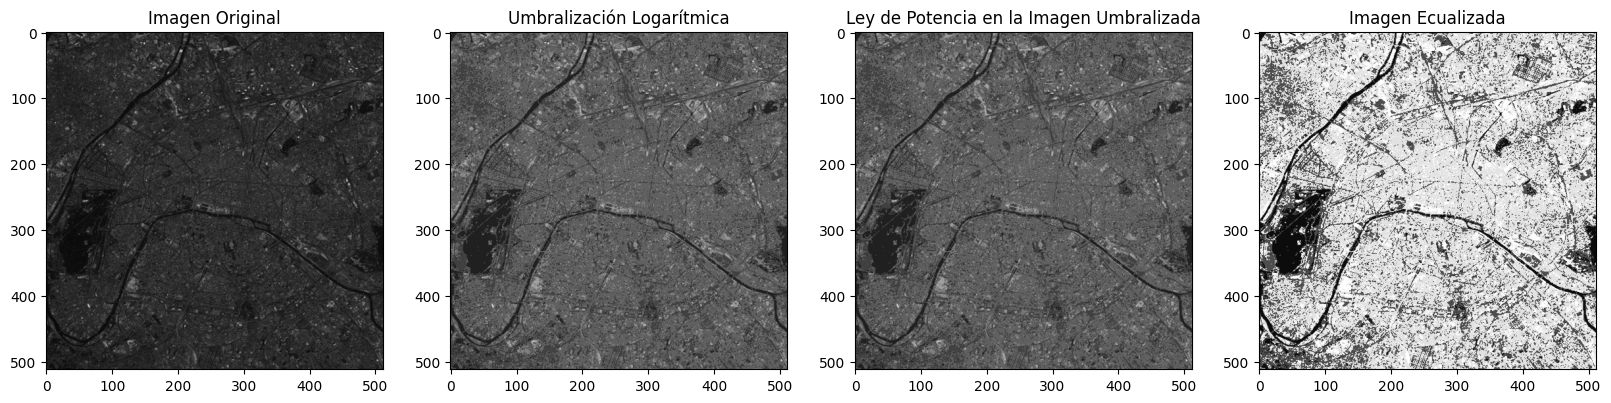

In [20]:
# Aplicar el ecualizador de histograma
imagen_ecualizada = cv2.equalizeHist(imagen_potencia)

# Mostrar la imagen original, la imagen umbralizada logarítmicamente, la imagen con ley de potencia y la imagen ecualizada
plt.figure(figsize=(20, 5))

plt.subplot(141)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')

plt.subplot(142)
plt.imshow(imagen_umbralizada, cmap='gray')
plt.title('Umbralización Logarítmica')

plt.subplot(143)
plt.imshow(imagen_potencia, cmap='gray')
plt.title('Ley de Potencia en la Imagen Umbralizada')

plt.subplot(144)
plt.imshow(imagen_ecualizada, cmap='gray')
plt.title('Imagen Ecualizada')

plt.show()